<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

## Using Monte Carlo Simulations:
* [To project a firm's future gross profit](#first-bullet)
* [To predict a stocks future price](#second-bullet)
* [To calculate the price of a call option using the Black-Scholes-Morten formula](#third-bullet)
* [To calculate the price of a call option using Euler Discretization](#fourth-bullet)

In [1]:
import pandas as pd
import pandas_datareader as wb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

## Project a firm's future gross profit <a class="anchor" id="first-bullet"></a>

In [2]:
#Consider expected revenues for this year as $170 billion
rev_m = 170
#Consider the standard deviation as $20 billion
rev_stdev = 20
#Perform 1000 simulations of the company's expected revenues.
iterations = 1000

In [3]:
#Created 1000 values from a normal distribution
rev = np.random.normal(rev_m, rev_stdev, iterations)
rev

array([ 175.62118673,  163.90536287,  191.42648288,  157.9790055 ,
        171.50507756,  166.1546662 ,  202.69877715,  126.80027489,
        167.36335749,  166.63871536,  194.81248717,  151.58155843,
        175.59019694,  129.71357116,  190.74741893,  129.34055907,
        156.94774237,  168.18390334,  175.48547306,  144.92949461,
        159.14800111,  144.49619358,  152.69237222,  189.56344554,
        195.84559138,  147.56829307,  161.72555131,  130.27752447,
        157.01091675,  172.95430281,  161.98010631,  205.081538  ,
        184.48652803,  186.95348902,  125.98625635,  182.05404851,
        179.00658716,  152.00713726,  176.19328693,  153.17841208,
        176.83220528,  150.05877803,  188.39045124,  184.59706599,
        126.82394346,  178.47374616,  155.31432497,  179.65988612,
        173.18255982,  167.88999996,  179.84882339,  144.71748824,
        158.16718234,  168.09941368,  184.46386724,  170.9272874 ,
        148.1471448 ,  151.07848151,  183.23192009,  167.40158

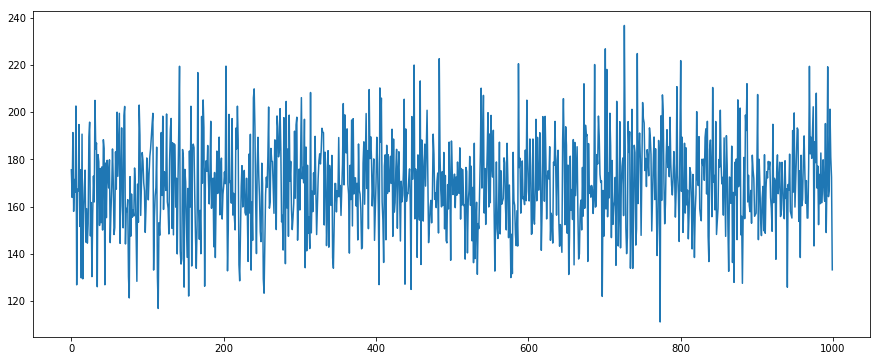

In [4]:
#Plot the values
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

We can see the created values are centered around the mean of 170.

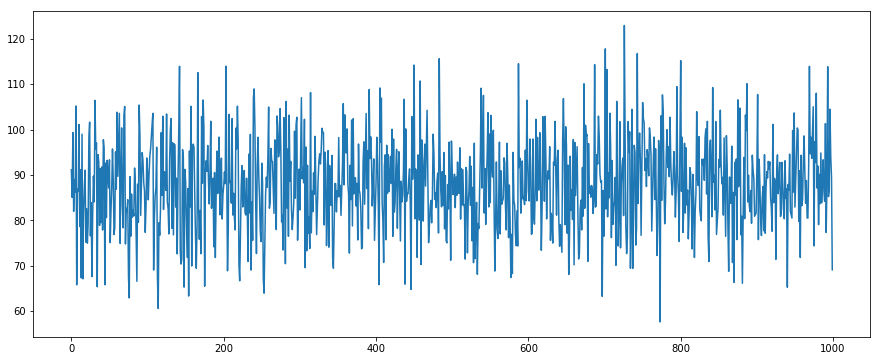

In [5]:
#Consider the cost of goods sold to be 60% of the revenue and it's std dev to be 10%
COGS = (rev * np.random.normal(0.6,0.1))
 
plt.figure(figsize=(15, 6))
plt.plot(COGS)
plt.show()

We obtain a normal distrubution with a varying mean value since it was randomly generated.

In [6]:
#Check the mean and standard deviation of Cost of goods sold
print(COGS.mean(), COGS.std())

87.9571487443 10.1348146893


The standard deviation is about 10% as desired.

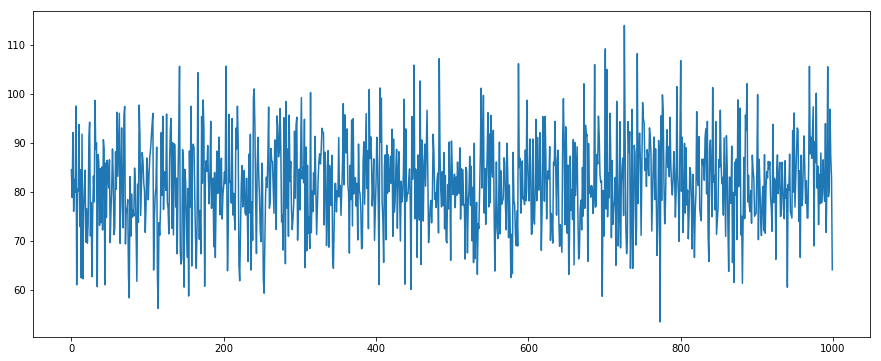

In [7]:
#Difference between revenues and cost of goods sold is gross profit
Gross_Profit = rev - COGS
Gross_Profit

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [8]:
#Calculating the max, min, mean and standard deviation of the gross profit
print(max(Gross_Profit), min(Gross_Profit), Gross_Profit.mean(), Gross_Profit.std())

113.91851231 53.3997486116 81.4910780142 9.38976520151


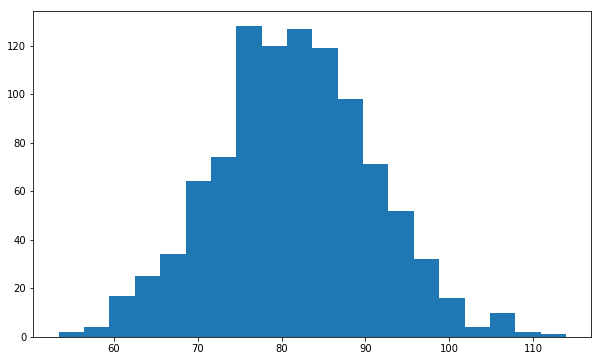

In [9]:
#Plot the results on a histogram.
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

As we can see the gross profit follows a normal distribution.

--------------------------------------------------

## Predict a stocks future price <a class="anchor" id="second-bullet"></a>

In [10]:
#To simulate the prediction of P&G's future stock price we need to consider data from the past 10 years (starting 1st Januaury 2007)
# data = pd.DataFrame()
# data= wb.DataReader('PG', 'google', start = '2007-1-1')['Close']
    
# data.head()

data = pd.read_csv('PG_2007_2017.csv', index_col = 'Date')

In [11]:
#Estimate P&G's historical log returns
log_returns = np.log(1 + data.pct_change())
#Same as np.log(data/data.shift(1))

In [12]:
log_returns.head()

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002203
2007-01-09,-0.002517


In [13]:
log_returns.tail()

,PG
Date,
2017-04-04,0.002562
2017-04-05,0.000667
2017-04-06,-0.006356
2017-04-07,-0.001903
2017-04-10,0.002910


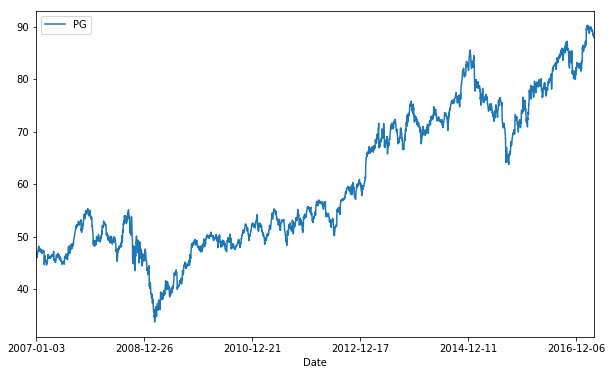

In [14]:
#Plot the variation of the P&G's stock price
data.plot(figsize=(10, 6))

The above plot shows that P&G's stock price has increased in the past 10 years.

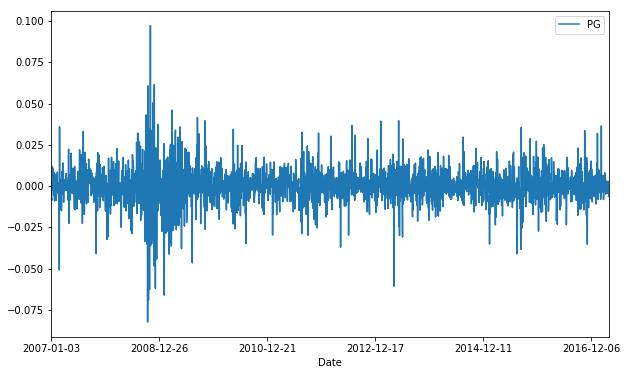

In [15]:
#Plot the log returns of the stock
log_returns.plot(figsize = (10, 6))

The above plot shows that P&G's log returns follow a normal distribution and the log returns are centered around a stable mean.

Calculate the mean and variance of the log returns since it is required for the calculation of the Brownian Motion.

In [16]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [17]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

Calculate drift (best approximation of future rates of the stock):

$$
drift = \mu - \frac{1}{2} \cdot \sigma^2 \\
$$

$\rightarrow \mu$ = mean; 
$\sigma$ = standard deviation; 
$\sigma^2$ = variance

In [18]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

We will not annualize any indicators since we are going to predict P&G's daily stock price.

In [19]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

Convert these values to array to help with calculations by using .values

In [20]:
print(drift.values, stdev.values)

[ 0.00018236] [ 0.0111381]


Second component of Brownian Motion is a random value Z (the number corresponding to the distance between the mean and the events, expressed as number of standard deviations). 

In [21]:
norm.ppf(0.95)

1.6448536269514722

The above expression shows that if an event has 95% probability of occuring the distance between the event and the mean will be approx. 1.65 standard deviations.

In [22]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.30736677, -1.44155336],
       [-0.41952916, -1.22491195],
       [ 0.45744678,  0.43353548],
       [ 0.27795512, -2.72647631],
       [-0.87639602,  0.90673001],
       [-0.14215777,  1.02336606],
       [-0.47613945, -1.41173122],
       [-0.34824554,  0.39494875],
       [ 1.02997971, -1.9287521 ],
       [-0.6649757 ,  0.12446087]])

The above array Z is created by probabilities generated by the random function and converting them to distances from the mean zero as measured by the number of standard deviations.

In [23]:
#Using time intervals to be 1000 since we will be forecasting the stock price for the upcoming 1000 days
t_intervals = 1000
#Create 10 series of future stock predictions
iterations = 10

Calculating daily returns:

$$
daily\_returns = e^{r}
$$

$$
r = drift + stdev \cdot Z
$$

In [24]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[ 1.00466585,  0.96929673,  0.99502744, ...,  0.99229415,
         1.01223745,  1.00373053],
       [ 1.00245071,  0.98761416,  0.97413508, ...,  0.99677368,
         0.99528475,  0.99283945],
       [ 1.02057148,  1.00812939,  1.00426467, ...,  0.98554707,
         0.99926459,  1.01647543],
       ..., 
       [ 1.01607041,  1.01608028,  0.98392591, ...,  1.00050295,
         1.00534806,  0.98491871],
       [ 0.98682678,  0.98417948,  0.98521632, ...,  0.99542816,
         0.99375014,  1.00180483],
       [ 0.98707084,  1.00287124,  0.9912323 , ...,  0.99564592,
         0.99387966,  0.99824522]])

We have thus generated 10 sets of random future stock prices.

Next step is to create a price list.

Each price is equal to the product of the price of the previous day and simulated daily return. Repeat this process a 1000 times to predict future stock prices for a 1000 days.

$$
S_t = S \mathbin{\cdot} daily\_return_t
$$
<br />
$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$

In [25]:
#First price on our list is the last price in the data set (the current market price) 
S = data.iloc[-1]
S

PG    88.118629
Name: 2017-04-10, dtype: float64

In [26]:
#Create as array with similar dimensions as daily returns
price_list = np.zeros_like(daily_returns)
price_list

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [27]:
#S is the first price for each of the 10 iterations we have to generate
price_list[0] = S
price_list

array([[ 88.118629,  88.118629,  88.118629, ...,  88.118629,  88.118629,
         88.118629],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       ..., 
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]])

In [28]:
#Create a loop from day 1 to day 1000
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]
    
price_list

array([[  88.118629  ,   88.118629  ,   88.118629  , ...,   88.118629  ,
          88.118629  ,   88.118629  ],
       [  88.33458205,   87.02720567,   85.83944787, ...,   87.83433009,
          87.703128  ,   87.48765074],
       [  90.15175496,   87.73468399,   86.20552459, ...,   86.564867  ,
          87.63863006,   88.92904769],
       ..., 
       [ 146.06786804,  119.92096778,  107.90018581, ...,  106.64398287,
         106.7959694 ,   81.51343424],
       [ 144.14368442,  118.02375546,  106.30502378, ...,  106.15642328,
         106.12850996,   81.66055235],
       [ 142.28002756,  118.36263041,  105.37297278, ...,  105.69421003,
         105.47896791,   81.51725608]])

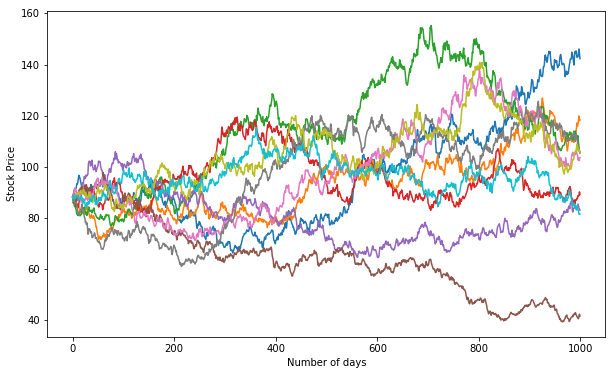

In [29]:
plt.figure(figsize=(10,6))
plt.xlabel('Number of days')
plt.ylabel('Stock Price')
plt.plot(price_list);

Thus we have generated 10 possible paths of the expected stock price of P&G for the next 1000 days.

--------------------------------------------------

## Calculate the price of a call option using the Black-Scholes-Morten formula <a class="anchor" id="third-bullet"></a>

Black Scholes Morten formula is as follows - 

$$
\textbf{C} = SN(d_1) - Ke^{-rT}N(d_2) 
$$
<br />
$$
d_1 = \frac{\ln(\frac{S}{K}) + (r + \frac{\sigma^2}{2})T}{\sigma \cdot \sqrt{T}}
$$
<br />
$$
d_2 = d_1 - \sigma \cdot \sqrt{T} = \frac{\ln(\frac{S}{K}) + (r - \frac{\sigma^2}{2})T}{\sigma \cdot \sqrt{T}}
$$
$\rightarrow$ S = Stock's current price, <br >
K = Strike price at which option can be exercised, <br >
T = Option's time until expiration in years, <br >
r = Risk-free rate, <br >
$\sigma$ = Standard deviation, <br >
N = Cumulative normal distribution, <br >
$d_1$ = Amount earned if option is exercised, <br >
$d_2$ = Amount paid while exercising the option

In [30]:
def d1(S, K, r, stdev_a, T):
    return (np.log(S / K) + (r + stdev_a ** 2 / 2) * T) / (stdev_a * np.sqrt(T))
 
def d2(S, K, r, stdev_a, T):
    return (np.log(S / K) + (r - stdev_a ** 2 / 2) * T) / (stdev_a * np.sqrt(T))

def BSM(S, K, r, stdev_a, T):
        return (S * norm.cdf(d1(S, K, r, stdev_a, T))) - (K * np.exp(-r * T) * norm.cdf(d2(S, K, r, stdev_a, T)))

Since the cumulative distribution tells how the data accumulates in time, it's ouput is always between 0 and 1.
Here the function norm.cdf() works as N().

Now that all the necessary functions are defined, let's apply them for P&G.

In [31]:
#We have already defined the S and stdev. But now we have to annualize the standard deviation values.

stdev_a = log_returns.std() * 250 ** 0.5
stdev_a

PG    0.176109
dtype: float64

In [32]:
#Risk free rate = 2.5% (corresponding to the yield of a 10 year government bond as shown in Bloomberg)
r = 0.025
#Assume strike price as $110 and the time horizon of 1 year
K = 110.0
T = 1

In [33]:
#Lets calculate the call option price.

d1(S, K, r, stdev_a, T)

PG   -1.029416
dtype: float64

In [34]:
d2(S, K, r, stdev_a, T)

PG   -1.205525
dtype: float64

In [35]:
BSM(S, K, r, stdev_a, T)

PG    1.132067
Name: 2017-04-10, dtype: float64

The call option price as calculated is approx \$1.13. 

Value of the stock price is \$88 but the call option price is just \$1.13, since the value of the call option price depends on multiple parameters, such as strike price (K), time of maturity (T), volatility (stdev). 

--------------------------------------------------

## Calculate the price of a call option using Euler Discretization <a class="anchor" id="fourth-bullet"></a>

Earlier we calculated the price of a call option using a standard formula. We would now like to calculate the price in a different way to be sure of the price. Monte Carlo Simulations can provide us with thousands of possible call option prices. We could then average the payoff associated with these randomly generated values and discount it back to today. <br />
The formula we will be using is another version of Brownian motion which is called Euler Discretization.

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [36]:
#We will convert it to an array since we will be using it in array operations further on.
stdev = stdev_a.values
stdev

array([ 0.17610875])

We will again consider the same time horizon of 1 year. Since we are forecasting prices for one year ahead, the number of time intervals must correspond to the number of trading days in a year (i.e. 250).

In [37]:
T = 1.0 
t_intervals = 250 
delta_t = T / t_intervals 

#We will simulate the random value Z 10000 times.
iterations = 10000 

The random component Z will be a matrix with random components as drawn from a standard normal distribution (normal distribution with mean 0 and stdev of 1). Dimensions of the matrix will be defined by the number of time intervals + 1 and the number of iterations.

In [38]:
Z = np.random.standard_normal((t_intervals + 1, iterations))  
S = np.zeros_like(Z) 
S[0] = data.iloc[-1]

<br /><br />
$$
{\LARGE S_t = S_{t-1} \mathbin{\cdot} e^{((r - \frac{1}{2} \cdot stdev^2) \mathbin{\cdot} \delta_t + stdev \mathbin{\cdot} \sqrt{\delta_t} \mathbin{\cdot} Z_t)}  }
$$
<br /><br />

In [39]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_t + stdev * delta_t ** 0.5 * Z[t])

S

array([[  88.118629  ,   88.118629  ,   88.118629  , ...,   88.118629  ,
          88.118629  ,   88.118629  ],
       [  88.78237244,   88.27553019,   87.83908842, ...,   87.59665871,
          89.71633712,   87.01665588],
       [  88.49236717,   87.93290486,   87.44270239, ...,   89.31863893,
          89.98812692,   86.84624121],
       ..., 
       [  91.39050709,  115.17091122,   78.33398729, ...,   95.32723511,
          92.42532454,   80.85061884],
       [  92.19494512,  116.53809296,   78.22570791, ...,   95.54297142,
          92.65059177,   81.15708826],
       [  91.85317307,  115.68567226,   78.87157957, ...,   97.0003041 ,
          92.30379528,   79.89367057]])

In [40]:
#Dimensions
S.shape

(251, 10000)

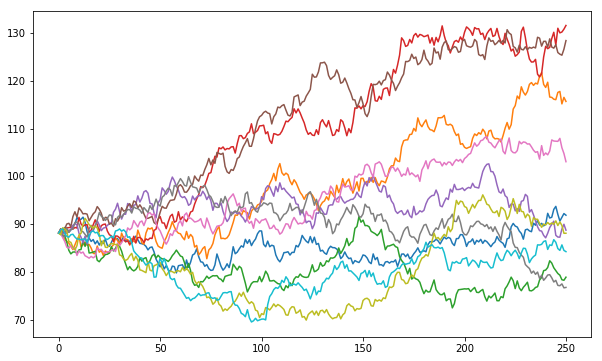

In [41]:
#Plot only first 10 simulations
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10]);

In [42]:
p = np.maximum(S[-1] - 110, 0)
p

array([ 0.        ,  5.68567226,  0.        , ...,  0.        ,
        0.        ,  0.        ])

In [43]:
p.shape

(10000,)

In [44]:
#Calculating the payoff of the call option 
C = np.exp(-r * T) * np.sum(p) / iterations
C  

1.0868430404063365

We calculated the price of call option in two ways (Euler Discretization and Black-Sholes-Morten formula) and obtained a nearly same result. Thus we can safely say that the price of the call option is around \$1.12.